# Basic Data Descriptors, Statistical Distributions, and Application to Business Decisions

1. [**Basic Data Descriptors**](#week-1-bdd)
2. [**Descriptive Measures of Association, Probability, and Statistical Distributions**](#week-2-dps)
3. [**The Normal Distribution**](#week-3-tnd)
4. [**Working with Distributions (Normal, Binomial, Poisson), Population and Sample Data**](#week-4-wwd)
---

## Basic Data Descriptors <a id="week-1-bdd"></a>
---
Including [mean](#mean), [median](#median), [mode](#mode), [standard deviation](#standard-deviation), [variance](#variance), [rull of thumb](#rule-of-thumb) and the [Cheybyshev's theorem](#cheybyshevs-theorem). And also range.

But first, let's import the data for this lesson.

Also, here are the links to the [quiz](#quiz-1-1) of this part and to the fancy [box plot](#box-plot)! And also to the fancy [histogram](#histogram).

In [1]:
import numpy as np
import pandas as pd

In [2]:
quiz_data = pd.read_excel("Excel files/1. Basic Data Descriptors.xlsx", "Raw Quiz", index_col=None, na_values=["NA"])

In [3]:
quiz_data.head()

,Order,Region,Age,Total Sale $
0,1000319,South,39,543.95
1,1002323,South,31,253.78
2,1005101,West,35,556.82
3,1008529,East,41,430.50
4,1008768,East,29,552.30


---

### Mean <a id="mean"></a>

Good when there are no "extreme" values (extremely large or small)

In [4]:
quiz_data["Total Sale $"].mean()

476.6905866666666

### Median <a id="median"></a>

50% of data is larger than the median, 50% is less

In [5]:
quiz_data["Total Sale $"].median()

479.505

### Mode <a id="mode"></a>

The most frequent occuring value

>[pandas.Series.mode](https://pandas.pydata.org/docs/reference/api/pandas.Series.mode.html) method always returns sorted Series of the most often values (even if there's only one)

In [6]:
quiz_data["Total Sale $"].mode()[0] # indexing to get the most often value

372.05

### Range
Just a distance between the minimum and the maximum values.

In [7]:
quiz_data["Total Sale $"].max() - quiz_data["Total Sale $"].min()

938.0899999999999

### Standard Deviation<a id="standard-deviation"></a>
The most frequent occuring value

$ \sqrt{ \frac{1}{n-1} \sum_{i=1}^{n} (difference_i)^2} $

>[pandas.Series.std](https://pandas.pydata.org/docs/reference/api/pandas.Series.std.html) normalized by n-1 (works for sample)

In [8]:
quiz_data["Total Sale $"].std()

120.2674590181762

### Variance<a id="variance"></a>
Measures how far a set of numbers is spread out from their average value
> Squared standard deviation

In [9]:
quiz_data["Total Sale $"].var()

14464.261698688691

In [10]:
120.2674590181762*120.2674590181762

14464.261698688691

### Rule of thumb<a id="rule-of-thumb"></a>
68% lies within 1 SD from the mean, 95% lies within 2 Standard Deviations
>Based on asumtion that data is bell shaped (normal distribution)

### Chebyshev's Theorem<a id="chebyshevs-theorem"></a>
At least $(1 - (1/k^2))$ of data lies within **k** SD from the mean
>At least 75% of data lies within 2 SD from the mean, regardless from the data distribution

To sum up: descriptive statistics include **measures of central tendency** (mean, median, mode) and **measures of dispersion** (range, interquartile range, standard deviation and variance.

### Box plot<a id="box-plot"></a>

A cool plot - you can see median, mean, range and interquartile range on this plot.

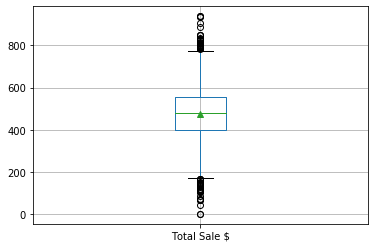

In [11]:
quiz_data.boxplot(column="Total Sale $", showmeans=True)

### Quiz 1 <a id="quiz-1-1"></a>

In [12]:
# Total number of orders
print("Total number of orders:", 
    len(quiz_data)
    )

# Difference between the median and the mean of total sale
average_total_sale = quiz_data["Total Sale $"].mean()
total_sale_median = quiz_data["Total Sale $"].median()
print("Difference between the median and the mean of total sale:", 
    abs(total_sale_median - average_total_sale)
    )

# Total sale standard deviation
print("Total sale standard deviation:", 
    quiz_data["Total Sale $"].std()
    )

# What percentage of orders fell within the interquartile range of Total Sale?
print("Percentage of orders fell within the interquartile range of Total Sale:",
    "50%" # IQR is a range of values between the 1st and the 3rd quartiles
    )

""" 
  Given the limited information you have, your boss wants you to group customers in a meaningful way. 
  You decide to take a look at how the order region impacts things. 
"""

# Calculate the average total sales from the North region only. 
north_average_total_sale = quiz_data[quiz_data["Region"] == "North"]["Total Sale $"].mean()
print("The average total sales from the North region only:", north_average_total_sale)

"""
  What is the difference between the North region average total sales and the average total sales across all regions 
  (including the North)? Round to 2 decimal places. 
"""
print("Difference between the North region average total sales and the average total sales: ", 
    round(abs(north_average_total_sale - average_total_sale), 2)
    )

"""
  What is the absolute value of difference between the North region median total sales and 
  all orders median total sales (across all regions including the North)?
"""
north_total_sale_median = quiz_data[quiz_data["Region"] == "North"]["Total Sale $"].median()
print("Difference between the North region median total sales and all orders median total sales:",
    round(abs(north_total_sale_median - total_sale_median), 2)
    )

"""
  Take a look at customer age. Create 3 age groups: 21-30, 31-40, 41-50. What is the average total sales
  for the age group with the highest average?
"""
quiz_data.loc[(quiz_data["Age"] >= 21) & (quiz_data["Age"] <= 30), "Age group"] = "21-30"
quiz_data.loc[(quiz_data["Age"] >= 31) & (quiz_data["Age"] <= 40), "Age group"] = "31-40"
quiz_data.loc[(quiz_data["Age"] >= 41) & (quiz_data["Age"] <= 50), "Age group"] = "41-50"
age_groupby_quiz_data = quiz_data.groupby("Age group")
highest_age_group_average = age_groupby_quiz_data.mean()["Total Sale $"].max()
print("The average total sales for the age group with the highest average",
    highest_age_group_average
    )

# What is the median total sales of the age group with the highest average Total Sales?
print("The median total sales of the age group with the highest average Total Sales",
    age_groupby_quiz_data.median()["Total Sale $"]
      [age_groupby_quiz_data.mean()["Total Sale $"] == highest_age_group_average].max()
    )

Total number of orders: 3000
Difference between the median and the mean of total sale: 2.814413333333391
Total sale standard deviation: 120.2674590181762
Percentage of orders fell within the interquartile range of Total Sale: 50%
The average total sales from the North region only: 478.1339516129029
Difference between the North region average total sales and the average total sales:  1.44
Difference between the North region median total sales and all orders median total sales: 0.58
The average total sales for the age group with the highest average 494.62253999999956
The median total sales of the age group with the highest average Total Sales 479.265


And here's a fancy histogram: <a id="histogram"></a>

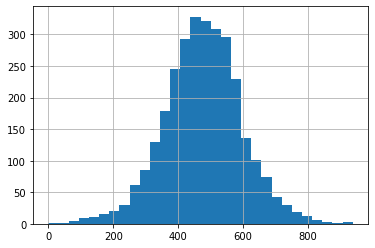

In [13]:
quiz_data["Total Sale $"].hist(bins=len(quiz_data)//100)

---
## Descriptive Measures of Association, Probability, and Statistical Distributions <a id="week-2-dps"></a>

In [14]:
quiz_data = pd.read_excel("Excel files/2. Descriptive Measures of Association, Probability and Statistical Distributions.xlsx", 
                       "Raw Quiz", index_col=None, na_values=["NA"])

In [15]:
quiz_data.head()

,Dataset A,Dataset B,Dataset C
0,962.901899,1711.576717,25.806023
1,542.172459,748.046625,195.736806
2,442.844917,399.014818,5.436013
3,736.420630,418.212011,29.536340
4,347.759818,184.606429,10.609514


Measures of association include [**covariance**](#covariance) and [**correlation**](#correlation) (the most popular ones, probably).

### Covariance <a id="covariance"></a>
One of the measures of association

$\frac{1}{n-1} \sum_{i}^{n}( X_i - \bar{X})( Y_i - \bar{Y}) $

In [16]:
quiz_data.cov()

,Dataset A,Dataset B,Dataset C
Dataset A,79391.945295,81420.522426,1.208582e+05
Dataset B,81420.522426,268481.454151,1.151984e+05
Dataset C,120858.163445,115198.394891,8.789164e+07


>The covariance measure is susceptible to the unit of measurement, we can arbitrarily inflate or deflate the covariance by choice of units. That's when the correlation comes in handy. Covariance ranges from $ - \infty $ to $ \infty $.

### Correlation <a id="correlation"></a>

$ Correlation = \frac{Covariance(X,Y)}{Stdev(X)Stdev(Y)} $

Another measure of association is correlation. It's not affected by the units of measurement. It's range is $ -1 $ to $ 1 $.
> Loosely speaking, correlations  > +0.5 or  < -0.5 are considered indicative of a strong positive or strong negative relationship between two variables.

In [17]:
quiz_data.corr()

,Dataset A,Dataset B,Dataset C
Dataset A,1.000000,0.557684,0.045752
Dataset B,0.557684,1.000000,0.023715
Dataset C,0.045752,0.023715,1.000000


### Causation <a id="causation"></a>

It is important to distinguish between Causation and Correlation. How do we establish causation though?

* Correlation 
* Temporal distinction between the *caused* and the *causing* variable
* Control for other variables that may cause the focal variable

### Probability <a id="probability"></a>

Long Run Frequencies notion of Probability: probability is a numerical measure of the frequency of occurrence of an event. It is measured on a scale from 0 to 1.  An event of probability 0 will definitely not occur.  An event with probability 1 will occur with certainty.

Example:
> The probability $ \frac{1}{6} $ of getting the number 6on rolling a fair dice can be considered as a long run frequency of multiple dice rolls

### Random Experiment and a Random Variable <a id="random-experiment"></a>

* **Random Experiment** is simply any situation wherein a process leads to more than one possible outcome. Examples: a coin toss, roll of a dice, a company declaring its Earnings, etc.

* A **random variable** is a variable that takes on values determined by the outcome of a random experiment.

> Viewing business processes as Random Experiment with an associated Random Variable is helpful in characterizing them and making predictions about the outcome.

### Statistical Distributions <a id="statistical-distributions"></a>

There are many statistical distributions, such as:
* Beta
* Binomial
* Gamma
* Poisson
* **Normal**
* **t distribution**

The last two are the most popular and quite easy to use in business statistics.

#### Discrete distribution
A statistical distribution used for Discrete (finite) data.

#### Continuous distribution
A statistical distribution used for Continuous (infinite) data.

Although normal distribution is continious, it is still common in business applications to use the Normal (the Bell curve) for discrete data.

### Quiz 2 <a id="quiz-1-2"></a>

In [18]:
# How many rows of data are included in the datasets given?
print(len(quiz_data))
# What is the covariance of Datasets A and B?  Round to 2 decimal places.
print(round(quiz_data[["Dataset A", "Dataset B"]].cov()["Dataset A"][1],2))
# Which dataset pair has the highest covariance?
print(quiz_data.cov(),"\n") # A-C
# Which dataset pair has the strongest relationship?
print(quiz_data.corr(),"\n") # A-B

2000
81420.52
               Dataset A      Dataset B     Dataset C
Dataset A   79391.945295   81420.522426  1.208582e+05
Dataset B   81420.522426  268481.454151  1.151984e+05
Dataset C  120858.163445  115198.394891  8.789164e+07 

           Dataset A  Dataset B  Dataset C
Dataset A   1.000000   0.557684   0.045752
Dataset B   0.557684   1.000000   0.023715
Dataset C   0.045752   0.023715   1.000000 



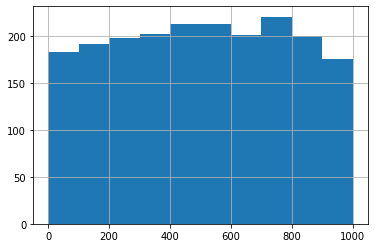

In [19]:
"""
  Create a histogram of Dataset A.
  Based on the shape of the distribution of outcomes, which of the following is most likely true?
"""
quiz_data["Dataset A"].hist(bins=10)

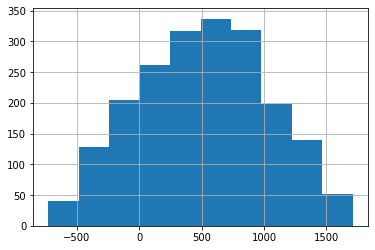

In [20]:
"""
  Create a histogram of Dataset B.
  Based on the shape of the distribution of outcomes, select the range below 
  that appears to have the highest probability of occurrence.
"""
quiz_data["Dataset B"].hist(bins=10)

---
## Normal Distribution <a id="week-3-tnd"></a>

Before exploring the normal distribution, let's learn about two other important topics: **Probability density function** and **Probability mass function**.

* Probability density function is a rule that assigns probabilities to various possible values that a random variable takes when it is being approximated by a particular statistical distribution.
* In the context of discrete data it's called probability mass function.

The main difference between them is that in case of probability density function, the probability of a particular outcome is always zero, hence we should always use ranges of outcomes.

### Normal Distribution
Any particular Normal Distribution can be uniquely defined by two parameters. The first parameter is also the mean of the distribution (location parameter) and the second parameter is also the standard deviation of the distribution (spread parameter).

Probability density function equation for the normal distribution is:

$ \frac{1}{\sqrt{2\pi * std^2}} e^{-(x-mean)^2 / 2*std^2} $

To calculate probabilities for various ranges of the random variable we calculate area under the curve in the range:

$ \int_{a}^{b}\frac{1}{\sqrt{2\pi * std^2}} e^{-(x-mean)^2 / 2*std^2} dx $

> Standard notation for distribution looks like this:
`Height ~ Normal(mean, std)`
where `Height` is the random variable and `Normal` is the destribution.

In [21]:
from scipy.stats import norm

The `.cdf()` method of the `norm` calculates area under the curve to the left from the `x`. `norm` is a normal continuous random variable. The location (`loc`) keyword specifies the mean. The scale (`scale`) keyword specifies the standard deviation.

Below are examples of calculating the probability of the random variable being less than 70:

In [22]:
norm(loc=85, scale=9).cdf(70)

0.0477903522728147

In [23]:
norm.cdf(70, loc=85, scale=9)

0.0477903522728147

What about a range between 75 and 80?

In [24]:
norm.cdf(80, loc=85, scale=9) - norm.cdf(75, loc=85, scale=9)

0.1559970978514666

We can also use the inverse function of `.cdf()` `.ppf()` to find out the value of the random variable based on the probability of that value.

In [25]:
norm.ppf(0.04779, loc=85, scale=9)

69.9999681287105

### Quiz 3 <a id="quiz-1-3"></a>

In [26]:
"""
   1.
   A new airline company has a commuter airplane that can hold up to 64 passengers.
   The plane flies a single route and charges passengers $300 for a one-way fare.
   All fares are 100% refundable if the passenger does not show up for the flight.
   The fixed cost (the cost that does not change with the number of passengers, such as crew salaries,
   airport fees, etc) for every flight is $1,000.
   The variable cost (the additional cost per passenger) for every flight is $150 per passenger.
   
   Create a spreadsheet that calculates the total profit per flight based on the number of passengers on the plane. 
   What is the total profit if they fly with 56 passengers?
"""
q_df = {"Total number of passengers": [i for i in range(1, 65)]}
q_df = pd.DataFrame(data=q_df)
q_df["Variable Cost"] = q_df["Total number of passengers"] * 150
q_df["Total Cost"] = q_df["Variable Cost"] + 1000
q_df["Revenue"] = q_df["Total number of passengers"] * 300
q_df["Profit"] = q_df["Revenue"] - q_df["Total Cost"]
print("1. The total profit with 56 passengers is:",
      int(q_df[q_df["Total number of passengers"] == 56]["Profit"]), "\n")

"""
   2.
   Because they have a full refund policy, it is common for customers not to show up.
   Airline company management is wondering if it would make financial sense to overbook the flight 
   and risk having not enough seats for all passengers that show up.
   In that case, the airline would find volunteers to give up their seats in exchange for a free ticket
   to the same destination on the next available flight. This would cost $100 for each overbooked passenger.  
   
   Update your spreadsheet to account for overbooked passengers.
   What is the total profit if they fly with 64 passengers after having sold 72 tickets,
   assuming all 72 passengers show up?
"""
print("2. Total profit with 72 passengers (full airplane w/ 8 overbooked tickets) is:",
      int(q_df[q_df["Total number of passengers"] == 64]["Profit"]) - ((72 - 64) * 100), "\n")

"""
   3.
   If 80 tickets are sold, the number of passengers expected to show up can be approximated by a normal
   distribution with a mean of 68 and standard deviation of 5. 
   Therefore, if the airline sells 80 tickets for the flight, what is the probability that the number
   of passengers who show up will result in an overbooked flight?
   
   Enter your answer as a decimal probability (not a percent) rounded to 4 decimal places.
"""
print("3. The probability that the number of passengers who show up will result in an overbooked flight if the airline sells 80 tickets for the flight is:",
      round(1 - norm.cdf(64, loc=68, scale=5),4), "\n")

"""
   4.
   Using the same distribution as the previous question, there is a 0.10 probability that more than
   _________ passengers show up.
   Please round your answer to the lowest integer.
"""
print("4. There is a 0.10 probability that more than", 
      round(norm.ppf(0.90, loc=68, scale=5)), "passengers show up.", "\n")

"""
   5.
   Continuing with the same distribution, what is the probability that less than or equal to 60 passengers show up?
   Enter your answer as a decimal probability (not a percent) rounded to 4 decimal places.
"""
print("5. The probability that less than or equal to 60 passengers show up is:", 
      round(norm.cdf(60, loc=68, scale=5),4), "\n")

"""
   6.
   XYZ Company produces copper pipes to be supplied to a local utility company. 
   The requirement of the utility company is that the pipes need to be 200 cm of length.  
   Longer pipes are acceptable to the utility company but any pipe less than 200 cm is summarily rejected and
   has to be scrapped. The XYZ Company loses all its production cost on pipes that are rejected.
   
   The production process is such that it has some variability in the lengths of pipes produced, 
   and this variability can be well approximated by a Normal distribution. 
   The company can adopt one of the following three production processes:

   Process A: Produces pipes with an average length of 200 cm and a standard deviation of 0.5 cm
   Process B: Produces pipes with an average length of 201 cm and a standard deviation of 1 cm
   Process C: Produces pipes with an average length of 202 cm and a standard deviation of 1.5 cm
   
   If the company adopts the third Process (Process “C”), what is the probability it will have 
   its pipe rejected by the utility company? 
   Enter your answer as a decimal probability (not a percent) rounded to 4 decimal places.
"""
print("6. If the company adopts the third Process the probability it will have its pipe rejected by the utility company is:",
      round(norm.cdf(200, loc=202, scale=1.5),4), "\n")

"""
   7.
   The utility company temporarily changes its requirements and
   has a new requirement that it will accept any pipe of length from 199 cm till
   202 cm. That is, pipes ranging in length from 199 cm to 202 cm will be
   accepted, others will be rejected.

   With this changed requirement which Production process (out
   of the three) will result in the least % of rejections?
"""
print("7. With changed requirement the production processes will result in the following % of acceptance:",
      "\nA:", round(norm.cdf(202, loc=200, scale=0.5),4) - round(norm.cdf(199, loc=200, scale=0.5),4),
      "\nB:", round(norm.cdf(202, loc=201, scale=1),4) - round(norm.cdf(199, loc=201, scale=1),4),
      "\nC:", round(norm.cdf(202, loc=202, scale=1.5),4) - round(norm.cdf(199, loc=202, scale=1.5),4), "\n"
     )
# A

"""
   8.
   XYZ Company earns a revenue of $200 for every pipe that gets accepted and loses all money for any pipe
   that is rejected. The cost of producing the pipes is $140 per pipe if
   production process “A” is used, $160 per pipe if production process “B” is
   used, and $177 per pipe if production process “C” is used.

   Given this information, which production process would you
   recommend to maximize profits (revenue minus cost) if the requirement of the
   utility company is that pipes need to be of 200 cm (or more) and any pipe less
   than 200 cm is rejected?
"""
print("8. Maximazied profits of each production process are:"
      "\nA:", (1 - round(norm.cdf(200, loc=200, scale=0.5),4)) * (200 - 140),
      "\nB:", (1 - round(norm.cdf(200, loc=201, scale=1),4)) * (200 - 160),
      "\nC:", (1 - round(norm.cdf(200, loc=202, scale=1.5),4)) * (200 - 177))
# B

1. The total profit with 56 passengers is: 7400 

2. Total profit with 72 passengers (full airplane w/ 8 overbooked tickets) is: 7800 

3. The probability that the number of passengers who show up will result in an overbooked flight if the airline sells 80 tickets for the flight is: 0.7881 

4. There is a 0.10 probability that more than 74.0 passengers show up. 

5. The probability that less than or equal to 60 passengers show up is: 0.0548 

6. If the company adopts the third Process the probability it will have its pipe rejected by the utility company is: 0.0912 

7. With changed requirement the production processes will result in the following % of acceptance: 
A: 0.9772 
B: 0.8185 
C: 0.4772 

8. Maximazied profits of each production process are:
A: 30.0 
B: 33.652 
C: 20.9024


---
## Working with Distributions (Normal, Binomial, Poisson), Population and Sample Data <a id="week-4-wwd"></a>

### Applications of the Normal Distribution:

1. John can take either of two roads to the airport from his home (Road A or Road B). Owing to varying traffic conditions the travel times on the two roads are not fixed, rather on a Friday around midday the travel times across these roads can be well approximated per normal distributions as follows,

Road A:  mean =54 minutes, std = 3 minutes 

Road B:  mean =60 minutes, std = 10 minutes

> 1.1 Which road should he choose if on midday Friday he must be at the airport within 50 minutes to pick up his spouse?

In [27]:
print("A:", norm.cdf(50, loc=54, scale=3),
      "\nB:", norm.cdf(50, loc=60, scale=10))

A: 0.09121121972586788 
B: 0.15865525393145707


2. A fast-food restaurant sells ‘falafel’ sandwiches. On a typical weekday, the demand for these sandwiches can be approximated by a normal distribution with mean 313 sandwiches and standard deviation of 57 sandwiches

> 2.1 What is the probability that on a particular day the demand for falafel sandwiches is less than 300 at the restaurant?

In [28]:
print("The probability that on a particular day the demand for falafel sandwiches is less than 300 at the restaurant is:",
     ("\n" + str(round(norm.cdf(300, loc=313, scale=57), 4))))

The probability that on a particular day the demand for falafel sandwiches is less than 300 at the restaurant is: 
0.4098


> 2.2 If the restaurant stocks 400 falafel sandwiches for a given day, what is the probability that it will run out of these sandwiches on that day?

In [29]:
print("If the restaurant stocks 400 falafel sandwiches for a given day, the probability that it will run out of these sandwiches on that day is:",
     ("\n" + str(round(1 - norm.cdf(400, loc=313, scale=57), 4))))

If the restaurant stocks 400 falafel sandwiches for a given day, the probability that it will run out of these sandwiches on that day is: 
0.0635


> 2.3 How many sandwiches must the restaurant stock to be at least 98% sure of not running out on a given day?

In [30]:
print("If the restaurant stocks 400 falafel sandwiches for a given day, the probability that it will run out of these sandwiches on that day is:",
     ("\n" + str(int(np.ceil(norm.ppf(0.98, loc=313, scale=57))))))

If the restaurant stocks 400 falafel sandwiches for a given day, the probability that it will run out of these sandwiches on that day is: 
431


In [31]:
np.ceil(22.2)

23.0

#### The Standard Normal Distribution
It is a Normal distribution with mean = 0 and std = 1

You can convert any normal distribution to standard normal as follows: 
```
Suppose X ~ Normal(mean, std )
Let Z = (X -mean)/std
Then Z ~ Normal(0, 1)
```

### Population and a Sample

**Population**

It is the complete set of numerical information on a particular quantity in which we as an analyst are interested.

**Sample**

It is a subset of the relevant population and is used to make inferences about the population.

Populations and Samples are *context driven*. 

**Sample** is:

* A subset of the population 
* Representative of the population

The easiest way to get a representative sample is to randomly select the sample.

### The Central Limit Theorem

Notation:

* Population Data:

> Population Mean: $\mu$

> Population Standard Deviation: $\sigma$

* Sample Data:

> Sample Mean: $\bar{x}$

> Sample Standard Deviation: $s$

Consider a random sample of $n$ observations from a population with mean $\mu$ and standard deviation $\sigma$

Let $\bar{x}$ be the sample mean.

Then the _distribution_ of $\bar{x}$ is approximately Normal with mean $=\mu$ and standard deviation $=\frac{\sigma}{\sqrt{n}}$.

That is, $\bar{x}$ ~ Normal($\mu$,$\frac{\sigma}{\sqrt{n}}$) and this approximation gets better as sample size increases.

In Plain Language the Central Limit Theorem says:

>Sample averages are normally distributed irrespective of where the sample came from. Not only are they normally distributed but more importantly they are normally distributed with mean equal to the population mean. 

### (Two) Popular Discrete Distributions

* **The Binomial**
* **The Poisson**

#### The Binomial Distribution

**Bernoulli Process**

A situation where the random variable has only two mutually exclusive outcomes. Examples:

* Exam grade -> pass/fail
* Coin toss -> heads/tails
* Lottery -> win/lose

**Multiple Trials of the Bernoulli Process**:

Game of Dice:

`Win (if you roll a 6)/ Lose (otherwise)`

Random Variable -> Number of times you win when you roll the dice `n` times.

Consider a situation where there are `n` independent trials, where the probability of **success** on each trial is `p` and the probability of **failure** is `1-p`.

Define random variable **X** to denote number of successes in `n` trials.
Then this random variable is said to have a Binomial distribution.

In our example...
```
n= 10
p= 1/6 = 0.1667
success= getting a 6 in one roll
X= Number of times you win when the dice is rolled ten times
```

**Probability Mass Function**:

$P(X=x)=\frac{n!}{x!(n-x)!}p^{x}(1-p)^{n-x}$

*Note: `X` - random variable, `x` - various possible values that the random variable can take*

In [32]:
from scipy.stats import binom

In [33]:
print("probability that you win three times in ten rolls of a dice:",
      binom.pmf(3, 10, 0.1667))
print("probability that you win at most five times in ten rolls of a dice:",
      binom.cdf(5, 10, 0.1667))
print("probability that you win less than five times in ten rolls of a dice:",
      binom.cdf(4, 10, 0.1667))
print("probability that you win at least three times in ten rolls of a dice:",
      binom.sf(2, 10, 0.1667)) # or 1 - binom.cdf(2, 10, 0.1667))

probability that you win three times in ten rolls of a dice: 0.15509497185547189
probability that you win at most five times in ten rolls of a dice: 0.9975592376444791
probability that you win less than five times in ten rolls of a dice: 0.9845250055787355
probability that you win at least three times in ten rolls of a dice: 0.2248662349249274


Mean of the Binomial Distribution = $n*p$

Standard Deviation of the Binomial Distribution = $\sqrt{np(1-p)}$

Example of business application of the binomial distribution:

>In the current tax year, IRS estimates that 5% of the many high networth individual tax returns would be fraudulent. That is they will contain errors that are purposely made to cheat the government. Although these errors are often well concealed, let’s suppose that a thorough IRS audit will uncover them.

If a random 250 high net worth tax returns are audited, what is the probability that the IRS will uncover at least 15 fraudulent returns but at most 20 fraudulent returns?

In [34]:
binom.cdf(20, 250, 0.05) - binom.cdf(14, 250, 0.05)

0.25630709256965034

#### The Poisson Distribution

Examples:

* The number of fatal traffic accidents in a city in a particular week.
* The number of customers arriving at the store checkout line during a given hour.
* The number of defective items produced in a day on the assembly line of a farm equipment manufacturer.

**The number of occurrences can be viewed as a random variable which can then be approximated by the Poisson distribution.**

**Probability Mass Function**:

$P(X=x)=\frac{e^{-\lambda}\lambda^x}{x!}$

Example:
>A local convenience store uses a Poisson distribution to approximate the number of customers arriving each hour during weeknights at the only checkout counter at the store. From past data it knows that on average 30.5 customers arrive per hour at the checkout counter during weeknights.

What is the probability that 25 customers arrive at this checkout counter in a given hour during a weeknight?

In [35]:
from scipy.stats import poisson

In [36]:
poisson.pmf(25, 30.5)

0.0468671566896282

What is the probability that fewer than 33 customers arrive at this checkout counter in a given hour during a weeknight?

In [37]:
poisson.cdf(32, 30.5) # fewer than 33 == fewer or equal to 32

0.6510863857312866

What is the probability that the number of customers who arrive at this checkout counter in a given hour during a weeknight will be greater than 35?

In [38]:
poisson.sf(35, 30.5)

0.18096957030134617

### Quiz  4<a id="quiz-1-4"></a>

1.

You make widgets.  You want to sell your widgets at the nearby widget store, since this would potentially increase your sales.  However, you would have to pay a transportation cost every day to send you widgets over to the store. You decide to run some calculations to see if you would be at risk of losing money due to the transportation costs. 

You know that 5 other widget companies sell widgets at that store, so you would be the 6th. Assuming a customer is equally likely to select any of the widgets, what is the probability they will select and purchase your widget? Write your answer as a probability (not a percent) rounded to 4 decimals.

In [39]:
round(1 / 6, 4)

0.1667

2.

The widget store owner tells you that 200 customers arrive and purchase a widget from the store each day. Assuming you must sell 30 of your widgets to cover the transportation costs, and given the probability you calculated in question 1, use a binomial distribution to estimate the probability of at least covering the transportation costs (that is, the probability of selling at least 30 widgets). Write your answer as a probability (not a percent) rounded to 4 decimals.

In [40]:
round(binom.sf(29, 200, 0.1667),4)

0.7638

3.

How many minimum number of people would have to visit the store to give you at least a 0.95 probability of covering the transportation costs?

In [41]:
binom.sf(29, 232, 0.1667)

0.9507952169806311

4.

The widget store manager points out that not all widget brands get equal purchase rates. A brand on premium shelf space has a 0.28 probability of being selected by each customer. He is willing to give you premium shelf space at the front of the store for a small fee. The additional fee, plus the original transportation costs, would raise the minimum number of widgets you would have to sell to 40 (to cover transportation costs and additional fee).

Assuming 200 customers come into the store, use a binomial distribution to estimate the probability of at least covering the transportation costs and additional fee. Write your answer as a probability (not a percent) rounded to 4 decimals.

In [42]:
round(binom.sf(39, 200, 0.28),4)

0.9963

5.

The widget store manager reminds you that while the average number of people that show up each day is 200, the actual number varies. He tells you that the customers that show up each day can be modeled with a Poisson distribution where lambda = 200. 

What is the probability that at least 200 customers arrive (that is, either 200 or more than 200 customers arrive)? Write your answer as a probability (not a percent) rounded to 4 decimals.

In [43]:
round(poisson.sf(199, 200),4)

0.5094

6.

How many minimum number of people would have to visit the store to give you at least a 0.95 probability of covering the transportation costs and the additional fee? Use as 0.28 the probability of a widget being selected by a person.

HINT: You need to sell at least 40 widgets to cover transportation cost and the additional fee. So the number of "successes" need to be greater than equal to 40. The probability of "success" in each trial is 0.28. Now use the BINOM.DIST function trying out various values for "n", the number of trials.

In [44]:
binom.sf(39, 176, 0.28)

0.9521224082877466

7.

You are curious about the accuracy of the estimates that the widget store owner gave you. If you wanted to take a random sample of daily customer arrivals, from which of the following is the population you should sample?

* ~The number of arrivals each day for this widget store and the competing widget store down the street.~

* The number of arrivals each day for all days this specific widget store has been open.

* ~The number of arrivals each day for this specific widget over the past month.~

* ~A random, representative sample of the number of arrivals each day to this specific widget store.~

8.

The store owner gives you data on customer arrivals over the last 3 years. You randomly select a sample of daily customer arrivals, and then take the mean of that sample. If you were to repeat this process multiple times, you would expect the distribution of the sample means to be:

* A Normal Distribution

* ~A Binomial Distribution~

* ~A Poisson Distribution~

* ~The same distribution as the population of interest~

9.

Assuming the widget store owner's original estimates (given in Question 5) are accurate, what would you expect the mean of the distribution above to be?

200